In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from adam_prepare import titanic_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

## Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [2]:
# TRAIN, VALIDATE, TEST DATA YOU ACQUIRED:

# SPLIT DATA

train, val, test = titanic_pipeline()
train.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,0,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,1,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,0,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,0,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [3]:
train.shape, val.shape

((623, 13), (134, 13))

---

In [4]:
# CREATE X AND Y DATAFRAMES FOR TRAIN & VALIDATE

# define a function to split our subsets into X and y.
def xy_split(df):
    
    return df.drop(columns = ['survived']), df.survived

In [5]:
# X = ALL FEATURES/INDEPENDENT VARIABLES, WHERE IT REPRESENTS RELATIONAL FEATURES USED TO PREDICT GROUND TRUTH 
# y = TARGET/DEPENDENT VARIABLE, WHERE IT REPRESENTS GROUND TRUTH THAT THE MODEL LEARNS TO PREDICT

X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


---

In [6]:
# TRANSFORM NUMERICAL FEATURES TO A SPECIFIED RANGE ON A SIMILAR SCALE AS THE REST OF FEATURES.
# THIS PREVENTS LARGE MAGNITUDES FROM DOMINATING BAHAVIOR OF MODEL
# DEFAULT RANGE IS (0,2) BECAUSE WHEN ONE-HOT ENCODING CATEGORICAL DATA USING pandas get_dummies() FUNCTION, IT 
# TRANSFORMS FEATURE VALUES TO FALSE OR TRUE (0,1)

mms = MinMaxScaler()

X_train[['age', 'fare']] = mms.fit_transform(X_train[['age', 'fare']])
X_val[['age', 'fare']] = mms.transform(X_val[['age', 'fare']])

X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0.233476,1,0,0.103644,0,1,1,0,0,0,0,1
45,0.359135,0,0,0.015713,1,1,0,0,1,0,0,1
28,0.359135,0,0,0.015379,1,0,0,0,1,0,1,0
633,0.359135,0,0,0.000000,1,1,1,0,0,0,0,1
403,0.346569,1,0,0.030937,0,1,0,0,1,0,0,1


---

In [7]:
# TRAIN MODEL 

# CREATE KNN OBJECT
knn = KNeighborsClassifier()

# USE .fit() METHOD TO AUTOMATICALLY OPTIMIZE INTERNAL PARAMETERS OF THE MODEL USING THE TRAINING DATA
knn.fit(X_train, y_train)

KNeighborsClassifier()

---

In [8]:
# MAKE PREDICTIONS BASED OF THE EUCLIDEAN DISTANCE FROM NEW DATA POINT TO FEATURES AND CHOOSES MODE OF CLOSEST FEATURES
# YOUR MODEL LEARNED DURING TRAINING TO NEW DATA

# SO HOW DOES IT KNOW IF EACH FEATURE IS TRUE OR FALSE IF WE DROP THE TARGET VARIBALE FROM THE  X TRAIN?

y_pred = knn.predict(X_train)
y_pred[:5]

array([1, 0, 1, 0, 0])

---

In [9]:
# ESTIMATE THE PROBABILITY OF EACH PREDICTION

y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       ...,
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ]])

---

In [10]:
# VALIDATE MODEL

# EVALUATE ON OUT OF SAMPLE DATA

#y_pred = knn.predict(X_val)
#y_pred[:5]

In [11]:
#y_pred_proba = knn.predict_proba(X_val)
#y_pred_proba[:5]

In [12]:
#knn.score(X_val, y_val)

## Evaluate your results using the model score, confusion matrix, and classification report.

In [13]:
# EVALUATE THE MODEL

# COMPUTE THE ACCURACY OF YOUR MODEL USING .score() method
knn.score(X_train, y_train), knn.score(X_val, y_val)

(0.8619582664526485, 0.8208955223880597)

---

In [14]:
# CREATE CONFUSION MATRIX
print(confusion_matrix(y_train, y_pred))

[[352  32]
 [ 54 185]]


---

In [15]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       384
           1       0.85      0.77      0.81       239

    accuracy                           0.86       623
   macro avg       0.86      0.85      0.85       623
weighted avg       0.86      0.86      0.86       623



## Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [16]:
def theometrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN)
    true_positive_rate = TP / (TP + FN)
    false_positive_rate = FP / (FP + TN)
    true_negative_rate = TN / (TN + FP)
    false_negative_rate = FN / (FN + TP)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    support = TP + FN
    data = {
        'Metric': ['Accuracy', 'Recall', 'True Positive Rate', 'False Positive Rate', 'True Negative Rate', 'False Negative Rate', 'Precision', 'F1-Score', 'Support'],
        'Value': [accuracy, recall, true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate, precision, f1_score, support]
    }
    theometrics = pd.DataFrame(data)
    return theometrics

In [17]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,352,32
1,54,185


In [18]:
TP = 185
TN = 352
FP = 32
FN = 54

theometrics(TP, TN, FP, FN)


,Metric,Value
0,Accuracy,0.861958
1,Recall,0.774059
2,True Positive Rate,0.774059
3,False Positive Rate,0.083333
4,True Negative Rate,0.916667
5,False Negative Rate,0.225941
6,Precision,0.852535
7,F1-Score,0.811404
8,Support,239.000000


In [19]:
m1 = classification_report(y_train, y_pred)
print(m1)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       384
           1       0.85      0.77      0.81       239

    accuracy                           0.86       623
   macro avg       0.86      0.85      0.85       623
weighted avg       0.86      0.86      0.86       623



---

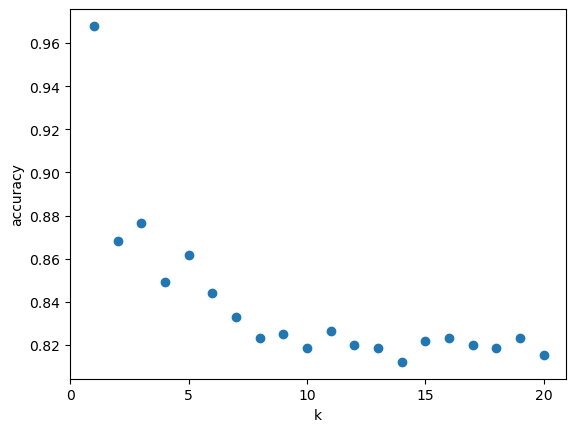

In [20]:
# VISUALIZE MODEL WITH K RANGE (1,21)

k_range = range(1, 21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()


## Run through steps 1-3 setting k to 10

In [21]:
k = 10

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.8186195826645265

In [22]:
y_pred = knn.predict(X_train)
y_pred[:5]

array([1, 0, 1, 0, 0])

In [23]:
m2 = classification_report(y_train, y_pred)
print(m2)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       384
           1       0.82      0.67      0.74       239

    accuracy                           0.82       623
   macro avg       0.82      0.79      0.80       623
weighted avg       0.82      0.82      0.81       623



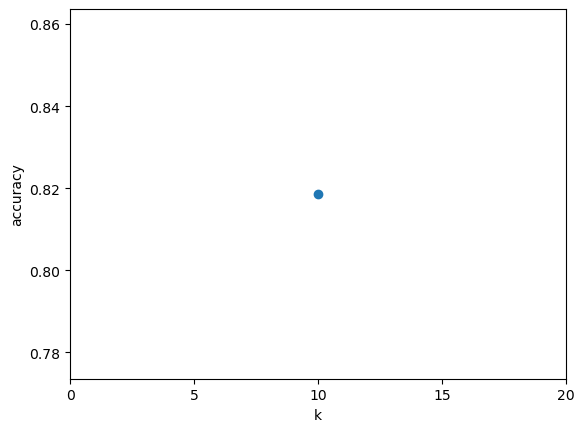

In [24]:
# VISUALIZE MODEL

k = 10
scores = knn.score(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k, scores)
plt.xticks([0,5,10,15,20])
plt.show()


## Run through steps 1-3 setting k to 20

In [25]:
k = 20

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.8154093097913323

In [26]:
y_pred = knn.predict(X_train)
y_pred[:5]

array([1, 0, 1, 0, 0])

In [27]:
m3 = classification_report(y_train, y_pred)
print(m3)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       384
           1       0.83      0.66      0.73       239

    accuracy                           0.82       623
   macro avg       0.82      0.79      0.80       623
weighted avg       0.82      0.82      0.81       623



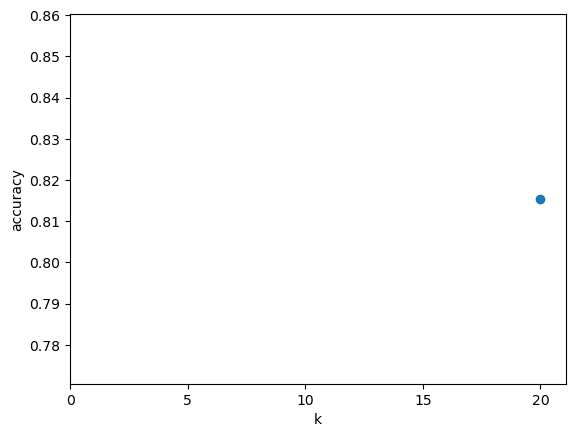

In [28]:
k = 20
scores = knn.score(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k, scores)
plt.xticks([0,5,10,15,20])
plt.show()


## What are the differences in the evaluation metrics?

In [29]:
print(m1)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       384
           1       0.85      0.77      0.81       239

    accuracy                           0.86       623
   macro avg       0.86      0.85      0.85       623
weighted avg       0.86      0.86      0.86       623



In [30]:
print(m2)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       384
           1       0.82      0.67      0.74       239

    accuracy                           0.82       623
   macro avg       0.82      0.79      0.80       623
weighted avg       0.82      0.82      0.81       623



In [31]:
print(m3)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       384
           1       0.83      0.66      0.73       239

    accuracy                           0.82       623
   macro avg       0.82      0.79      0.80       623
weighted avg       0.82      0.82      0.81       623



## Which performs better on your in-sample data? Why?

model 1 performs the best because it has highest accuracy score

## Which model performs best on our out-of-sample data from validate?

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_val, y_val)
knn.score(X_val, y_val)

0.8656716417910447

In [33]:
y_pred = knn.predict(X_val)
y_pred[:5]

array([1, 0, 0, 1, 0])

In [34]:
m1 = classification_report(y_val, y_pred)


In [35]:
k = 10

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_val, y_val)
knn.score(X_val, y_val)

0.8208955223880597

In [36]:
y_pred = knn.predict(X_val)
y_pred[:5]

array([1, 0, 0, 0, 0])

In [37]:
m2 = classification_report(y_val, y_pred)

In [38]:
k = 20

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_val, y_val)
knn.score(X_val, y_val)

0.746268656716418

In [39]:
y_pred = knn.predict(X_val)
y_pred[:5]

array([1, 0, 0, 0, 0])

In [40]:
m3 = classification_report(y_val, y_pred)

In [41]:
print(m1)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        82
           1       0.85      0.79      0.82        52

    accuracy                           0.87       134
   macro avg       0.86      0.85      0.86       134
weighted avg       0.87      0.87      0.86       134



In [42]:
print(m2)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        82
           1       0.91      0.60      0.72        52

    accuracy                           0.82       134
   macro avg       0.85      0.78      0.79       134
weighted avg       0.84      0.82      0.81       134



In [43]:
print(m3)

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        82
           1       0.85      0.42      0.56        52

    accuracy                           0.75       134
   macro avg       0.78      0.69      0.69       134
weighted avg       0.77      0.75      0.72       134



model 1 performs the best because it has highest accuracy score